##**MODELO PREDICTIVO PARA EL APOYO A LA GESTIÓN DE LA CARTERA DE UNA EMPRESA ADMINISTRADORA DE RIESGOS LABORALES (ARL)**

**Objetivo General:**
Construir un modelo que prediga cuáles empresas afiliadas a la ARL tienen mayor probabilidad de quedar en estado de mora, el mes siguiente al momento de realizar la consulta, con el fin de que la compañía pueda realizar la gestión preventiva con los clientes y reducir el riesgo de no pagos por parte de las empresas afiliadas.





#Dataset
La empresa brinda un dataset que consta de 30 variables, incluido el marcador de morosidad, del período de tiempo comprendido entre 2020-01-01 y 2020-06-01, con el fin de tener datos pre-pandemia y pandemia, y así procurar que el modelo se ajuste en mayor medida a la realidad del negocio.

Las variables del dataset son:
>*'id'*, identificador de la empresa anonimizado 

>*'Mes_Id'*, identificador año-mes

>*'Uen_Arp_Id'*, identificador(codigo) UEN numerico

>*'Regional_Arp_Id'*, identificador (codigo) de la regional numerico

>*'Oficina_Arp_Id'*, identificador (codigo) de la oficina numerico

>*'Tamano_Empresa_Arp_Id'*, identificador (codigo) del tamaño de numerico

>*'Estado_Empresa_Arp_Id'*, marca- indicador de mora o en cobertura de las empresas

>*'cant_siniestros'*, número de siniestros asociados a un contrato

>*'cant_novedades'*,  numero de novedades asociados a los pagos del mes

>*'Sector_Economico_Id'*, identificador (codigo) del sector economico numerico

>*'clasificacion_riesgo'*, identificador (codigo) para clasificar el nivel de 
riesgo de la actividad economica numerico

>*'Fecha_Inicio_Cobertura'*, fecha en que comenzo cobertura 

>*'ultimo_dia_mes'*, fecha último día del mes, correspondiente al mes_id

>*'Nro_afiliados'*, cantidad de afiliados o trabajadores por empresa

>*'Fecha_Limite_Pago'*, fecha límite de pago asignada a la empresa 

>*'fecha_real_pago'*, fecha en que se realiza el pago por parte de la empresa

>*'avg_Valor_Salario'*, media de los salarios de los trabajadores 

>*'IBC'*, Ingreso Base de Cotización

>*'Numero_Dias_Esperados'*, dias esperados para ser pagados

>*'Numero_Dias_Reportados'*, los días que reporto en el pago

>*'Numero_Total_Coberturas'*, numero de coberturas del contrato

>*'Valor_Cotizacion_Esperada'*, cotización calculada 

>*'Valor_Cotizacion_Reportada'*, cotización reportada 

>*'Valor_Ingreso_Base_Liq_Esp'*, totalizado Ingreso Base liquido esperado

>*'Valor_Ingreso_Base_Liq_Rep'*, totalizado Ingreso Base liquido reportado

>*'Valor_Saldo'*, saldo pendiente en el mes 

>*'Valor_Tasa_Cotizacion_Esp'*, totalizado valor tasa cotización esperado

>*'Valor_Tasa_Cotizacion_Rep'*, totalizado valor tasa cotización esperado

>*'valor_cartera'*, valor del saldo en cartera mes actual

>*'valor_cartera_mes_ant'*, valor del saldo en cartera mes anterior

>*'en_cartera'*, marca si la empresa se encuentra marcada en mora en el modelo de indicadores  




**1. Carga del dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**2. Importación de librerías**

Se importan todas las librerías necesarias para el análisis. 

In [ ]:
import datetime
%matplotlib inline
import pandas as pd
import numpy  as np
from numpy import mean
import seaborn as sns

from google.colab import files
import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from pandas.plotting import scatter_matrix
from imblearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import multilabel_confusion_matrix
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, precision_score, recall_score
sns.set(style="darkgrid")

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported fro

**3. Previsualización del dataset**

Se importa el dataset, desde el repositorio custodiado, y se realiza una previsualización de una muestra del mismo.

In [ ]:
df = pd.read_csv('/content/drive/Shareddrives/Monografia/dataset_esp.txt', delimiter = "\t")
df.head(5)

,id,Mes_Id,Uen_Arp_Id,Regional_Arp_Id,Oficina_Arp_Id,Tamano_Empresa_Arp_Id,Estado_Empresa_Arp_Id,cant_siniestros,cant_novedades,Sector_Economico_Id,clasificacion_riesgo,Fecha_Inicio_Cobertura,ultimo_dia_mes,Nro_afiliados,Fecha_Limite_Pago,fecha_real_pago,avg_Valor_Salario,IBC,Numero_Dias_Esperados,Numero_Dias_Reportados,Numero_Total_Coberturas,Valor_Cotizacion_Esperada,Valor_Cotizacion_Reportada,Valor_Ingreso_Base_Liq_Esp,Valor_Ingreso_Base_Liq_Rep,Valor_Saldo,Valor_Tasa_Cotizacion_Esp,Valor_Tasa_Cotizacion_Rep,valor_cartera,valor_cartera_mes_ant,en_cartera
0,217684039,202002,45,20,21,5347,EN COBERTURA,0,1,431,1,2015/07/07,2020/02/29,1.0,2020/03/17,2020/03/17,877803.0,877803,30.0,30.0,1,4600.0,4600.0,877803.0,877803.0,0.0,0.522,0.522,0.0,0.0,0
1,218069202,202006,45,20,21,5347,EN COBERTURA,0,1,235,2,2018/01/26,2020/06/30,1.0,2020/07/02,2020/07/02,1850000.0,1850000,30.0,30.0,1,19400.0,9700.0,1850000.0,1850000.0,-9700.0,1.044,0.522,0.0,0.0,0
2,218446223,202005,16,40,41,5347,EN COBERTURA,0,1,50,3,2019/10/04,2020/05/31,1.0,2020/06/12,2020/06/08,877803.0,877803,30.0,30.0,1,21400.0,21400.0,877803.0,877803.0,0.0,2.436,2.436,0.0,0.0,0
3,217758473,202006,34,40,41,5347,EN MORA,0,1,236,5,2016/09/13,2020/06/30,1.0,2020/07/13,2020/07/09,2600000.0,2600000,30.0,30.0,1,13600.0,13600.0,2600000.0,2600000.0,0.0,0.522,0.522,0.0,13600.0,1
4,217599766,202004,35,30,31,5347,EN MORA,0,1,236,1,2013/02/21,2020/04/30,1.0,2020/05/08,2020/05/15,1000000.0,1000000,30.0,30.0,1,5300.0,5300.0,1000000.0,1000000.0,0.0,0.522,0.522,5300.0,0.0,1


**4. Información del dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1057797 entries, 0 to 1057796
Data columns (total 31 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   id                          1057797 non-null  int64  
 1   Mes_Id                      1057797 non-null  int64  
 2   Uen_Arp_Id                  1057797 non-null  int64  
 3   Regional_Arp_Id             1057797 non-null  int64  
 4   Oficina_Arp_Id              1057797 non-null  int64  
 5   Tamano_Empresa_Arp_Id       1057797 non-null  int64  
 6   Estado_Empresa_Arp_Id       1057797 non-null  object 
 7   cant_siniestros             1057797 non-null  int64  
 8   cant_novedades              1057797 non-null  int64  
 9   Sector_Economico_Id         1057797 non-null  int64  
 10  clasificacion_riesgo        1057797 non-null  int64  
 11  Fecha_Inicio_Cobertura      1057797 non-null  object 
 12  ultimo_dia_mes              1057797 non-null  object 
 1

**5. Limpieza del dataset**

In [ ]:
# Búsqueda de nulos 
df.isnull().values.any()

False

In [ ]:
# Búsqueda de registros duplicados 
dupl = df.duplicated()
print(dupl.sum())

0


In [ ]:
# Verificar si existe algún '?' en la columna 'Fecha_Limite_Pago'

ind1= df[df['Fecha_Limite_Pago'] == '?'].index
ind1

Int64Index([], dtype='int64')

In [ ]:
# Verificar si existe algún '?' en la columna 'fecha_real_pago'

ind2 = df[df['fecha_real_pago'] == '?'].index #indica la posición del registro con '?'
print('cantidad de registros con valor ? ='+ str(ind2.value_counts().count()))
ind2

cantidad de registros con valor ? =56545


Int64Index([      9,      11,      14,      42,      56,      83,      92,
                 97,     105,     108,
            ...
            1057634, 1057647, 1057659, 1057662, 1057674, 1057681, 1057691,
            1057734, 1057745, 1057746],
           dtype='int64', length=56545)

In [ ]:
# Eliminar valores "faltantes" en la columna 'fecha_real_pago'(para la línea base).

df.drop(ind2, inplace=True)

In [ ]:
# Validar el borrado de los registros
ind2 = df[df['fecha_real_pago'] == '?'].index #indica la posición del registro con '?'
print('cantidad de registros con valor "?" = '+ str(ind2.value_counts().count()))
ind2

cantidad de registros con valor "?" = 0


Int64Index([], dtype='int64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1001252 entries, 0 to 1057796
Data columns (total 31 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   id                          1001252 non-null  int64  
 1   Mes_Id                      1001252 non-null  int64  
 2   Uen_Arp_Id                  1001252 non-null  int64  
 3   Regional_Arp_Id             1001252 non-null  int64  
 4   Oficina_Arp_Id              1001252 non-null  int64  
 5   Tamano_Empresa_Arp_Id       1001252 non-null  int64  
 6   Estado_Empresa_Arp_Id       1001252 non-null  object 
 7   cant_siniestros             1001252 non-null  int64  
 8   cant_novedades              1001252 non-null  int64  
 9   Sector_Economico_Id         1001252 non-null  int64  
 10  clasificacion_riesgo        1001252 non-null  int64  
 11  Fecha_Inicio_Cobertura      1001252 non-null  object 
 12  ultimo_dia_mes              1001252 non-null  object 
 1

Se realiza una primera reducción de la dimensionalidad, al decidir reemplazar las variables asociadas a las fechas esperada y real de pago por el valor de su diferencia, para obtener la cantidad de días que el afiliado se demoró en realizar el pago; se procedió de manera idéntica con la fecha de inicio de la cobertura y el último día del mes, con el fin de obtener una única variable que almacene la cantidad de días de vinculación de las empresas o personas afiliadas, en lugar de disponer de esas dos variables tipo fecha.

Adicionalmente, se decide eliminar el campo *Estado_Empresa_Arp_Id* dado que, como sus valores son indicadores de *MORA* o *EN COBERTURA*, se puede generar sesgo en los valores de salida del modelo, además de que no corresponde al valor actual del estado del cliente, para el momento en el cual se realiza la consulta.

In [ ]:
# Cálculo de las diferencias para las fechas
list(map(lambda x: datetime.datetime.strptime(x,'%Y/%m/%d').strftime('%Y-%m-%d'), df['Fecha_Inicio_Cobertura']))
list(map(lambda x: datetime.datetime.strptime(x,'%Y/%m/%d').strftime('%Y-%m-%d'), df['ultimo_dia_mes']))
list(map(lambda x: datetime.datetime.strptime(x,'%Y/%m/%d').strftime('%Y-%m-%d'), df['Fecha_Limite_Pago']))
list(map(lambda x: datetime.datetime.strptime(x,'%Y/%m/%d').strftime('%Y-%m-%d'), df['fecha_real_pago']))

# Se agregan los campos calculados al Dataframe original
df[['Fecha_Inicio_Cobertura','ultimo_dia_mes']] = df[['Fecha_Inicio_Cobertura','ultimo_dia_mes']].apply(pd.to_datetime)
new_col = (df['ultimo_dia_mes'] - df['Fecha_Inicio_Cobertura']).dt.days
df.insert(11, 'cant_dias_cobertura', new_col)

df[['Fecha_Limite_Pago','fecha_real_pago']] = df[['Fecha_Limite_Pago','fecha_real_pago']].apply(pd.to_datetime)
new_col = (df['fecha_real_pago'] - df['Fecha_Limite_Pago']).dt.days
df.insert(13, 'cant_dias_pago', new_col)

# Se eliminan los campos con formato de fecha y el campo estado_empresa_arp_id
df = df.drop('Fecha_Inicio_Cobertura', axis = 1)
df = df.drop('ultimo_dia_mes', axis = 1)
df = df.drop('Fecha_Limite_Pago', axis = 1)
df = df.drop('fecha_real_pago', axis = 1)

df = df.drop('Estado_Empresa_Arp_Id', axis=1)

Se obtiene una muestra del nuevo dataset:

In [ ]:
df.head(5)

,id,Mes_Id,Uen_Arp_Id,Regional_Arp_Id,Oficina_Arp_Id,Tamano_Empresa_Arp_Id,cant_siniestros,cant_novedades,Sector_Economico_Id,clasificacion_riesgo,cant_dias_cobertura,cant_dias_pago,Nro_afiliados,avg_Valor_Salario,IBC,Numero_Dias_Esperados,Numero_Dias_Reportados,Numero_Total_Coberturas,Valor_Cotizacion_Esperada,Valor_Cotizacion_Reportada,Valor_Ingreso_Base_Liq_Esp,Valor_Ingreso_Base_Liq_Rep,Valor_Saldo,Valor_Tasa_Cotizacion_Esp,Valor_Tasa_Cotizacion_Rep,valor_cartera,valor_cartera_mes_ant,en_cartera
0,217684039,202002,45,20,21,5347,0,1,431,1,1698,0,1.0,877803.0,877803,30.0,30.0,1,4600.0,4600.0,877803.0,877803.0,0.0,0.522,0.522,0.0,0.0,0
1,218069202,202006,45,20,21,5347,0,1,235,2,886,0,1.0,1850000.0,1850000,30.0,30.0,1,19400.0,9700.0,1850000.0,1850000.0,-9700.0,1.044,0.522,0.0,0.0,0
2,218446223,202005,16,40,41,5347,0,1,50,3,240,-4,1.0,877803.0,877803,30.0,30.0,1,21400.0,21400.0,877803.0,877803.0,0.0,2.436,2.436,0.0,0.0,0
3,217758473,202006,34,40,41,5347,0,1,236,5,1386,-4,1.0,2600000.0,2600000,30.0,30.0,1,13600.0,13600.0,2600000.0,2600000.0,0.0,0.522,0.522,0.0,13600.0,1
4,217599766,202004,35,30,31,5347,0,1,236,1,2625,7,1.0,1000000.0,1000000,30.0,30.0,1,5300.0,5300.0,1000000.0,1000000.0,0.0,0.522,0.522,5300.0,0.0,1


Se guarda el nuevo dataset para cargarlo desde este paso, en caso de ser necesario.

In [ ]:
#df.to_csv('/content/drive/Shareddrives/Monografia/dataset_limpio.csv') 
df = pd.read_csv('/content/drive/Shareddrives/Monografia/dataset_limpio.csv', delimiter = ",")
df=df.drop('Unnamed: 0', axis=1)
df.head()

,id,Mes_Id,Uen_Arp_Id,Regional_Arp_Id,Oficina_Arp_Id,Tamano_Empresa_Arp_Id,cant_siniestros,cant_novedades,Sector_Economico_Id,clasificacion_riesgo,cant_dias_cobertura,cant_dias_pago,Nro_afiliados,avg_Valor_Salario,IBC,Numero_Dias_Esperados,Numero_Dias_Reportados,Numero_Total_Coberturas,Valor_Cotizacion_Esperada,Valor_Cotizacion_Reportada,Valor_Ingreso_Base_Liq_Esp,Valor_Ingreso_Base_Liq_Rep,Valor_Saldo,Valor_Tasa_Cotizacion_Esp,Valor_Tasa_Cotizacion_Rep,valor_cartera,valor_cartera_mes_ant,en_cartera
0,217684039,202002,45,20,21,5347,0,1,431,1,1698,0,1.0,877803.0,877803,30.0,30.0,1,4600.0,4600.0,877803.0,877803.0,0.0,0.522,0.522,0.0,0.0,0
1,218069202,202006,45,20,21,5347,0,1,235,2,886,0,1.0,1850000.0,1850000,30.0,30.0,1,19400.0,9700.0,1850000.0,1850000.0,-9700.0,1.044,0.522,0.0,0.0,0
2,218446223,202005,16,40,41,5347,0,1,50,3,240,-4,1.0,877803.0,877803,30.0,30.0,1,21400.0,21400.0,877803.0,877803.0,0.0,2.436,2.436,0.0,0.0,0
3,217758473,202006,34,40,41,5347,0,1,236,5,1386,-4,1.0,2600000.0,2600000,30.0,30.0,1,13600.0,13600.0,2600000.0,2600000.0,0.0,0.522,0.522,0.0,13600.0,1
4,217599766,202004,35,30,31,5347,0,1,236,1,2625,7,1.0,1000000.0,1000000,30.0,30.0,1,5300.0,5300.0,1000000.0,1000000.0,0.0,0.522,0.522,5300.0,0.0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001252 entries, 0 to 1001251
Data columns (total 28 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   id                          1001252 non-null  int64  
 1   Mes_Id                      1001252 non-null  int64  
 2   Uen_Arp_Id                  1001252 non-null  int64  
 3   Regional_Arp_Id             1001252 non-null  int64  
 4   Oficina_Arp_Id              1001252 non-null  int64  
 5   Tamano_Empresa_Arp_Id       1001252 non-null  int64  
 6   cant_siniestros             1001252 non-null  int64  
 7   cant_novedades              1001252 non-null  int64  
 8   Sector_Economico_Id         1001252 non-null  int64  
 9   clasificacion_riesgo        1001252 non-null  int64  
 10  cant_dias_cobertura         1001252 non-null  int64  
 11  cant_dias_pago              1001252 non-null  int64  
 12  Nro_afiliados               1001252 non-null  float64
 1

**6. Exploración de los datos**

>Medidas de tendencia central

In [ ]:
df.describe()

,id,Mes_Id,Uen_Arp_Id,Regional_Arp_Id,Oficina_Arp_Id,Tamano_Empresa_Arp_Id,cant_siniestros,cant_novedades,Sector_Economico_Id,clasificacion_riesgo,cant_dias_cobertura,cant_dias_pago,Nro_afiliados,avg_Valor_Salario,IBC,Numero_Dias_Esperados,Numero_Dias_Reportados,Numero_Total_Coberturas,Valor_Cotizacion_Esperada,Valor_Cotizacion_Reportada,Valor_Ingreso_Base_Liq_Esp,Valor_Ingreso_Base_Liq_Rep,Valor_Saldo,Valor_Tasa_Cotizacion_Esp,Valor_Tasa_Cotizacion_Rep,valor_cartera,valor_cartera_mes_ant,en_cartera
count,1.001252e+06,1.001252e+06,1.001252e+06,1.001252e+06,1.001252e+06,1.001252e+06,1.001252e+06,1.001252e+06,1.001252e+06,1.001252e+06,1.001252e+06,1.001252e+06,1.001252e+06,1.001252e+06,1.001252e+06,1.001252e+06,1.001252e+06,1.001252e+06,1.001252e+06,1.001252e+06,1.001252e+06,1.001252e+06,1.001252e+06,1.001252e+06,1.001252e+06,1.001252e+06,1.001252e+06,1.001252e+06
mean,2.179925e+08,2.020035e+05,3.938780e+01,3.653640e+01,3.775126e+01,5.346334e+03,1.215558e-01,6.322652e+01,3.327150e+04,2.154709e+00,1.281972e+03,9.925194e+00,4.704437e+04,1.277054e+06,3.743654e+07,2.725197e+01,2.718431e+01,6.341927e+01,1.901134e+06,1.886419e+06,1.060896e+08,1.055060e+08,-1.471546e+04,2.002402e+00,1.931280e+00,2.901446e+04,2.798588e+04,1.825125e-01
std,3.195440e+05,1.709122e+00,1.179618e+01,1.239759e+01,1.268289e+01,1.321357e+00,1.927471e+00,1.506547e+03,9.521186e+04,1.452627e+00,1.318106e+03,4.097474e+01,4.640614e+06,1.295670e+06,5.027258e+08,5.583855e+00,5.953432e+00,1.510666e+03,4.172243e+07,4.174612e+07,3.200896e+09,3.198449e+09,9.285226e+05,2.083863e+00,2.045954e+00,4.362698e+05,4.093521e+05,3.862665e-01
min,2.174568e+08,2.020010e+05,1.000000e+00,2.000000e+01,2.100000e+01,5.343000e+03,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-1.830000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.657040e+08,5.201907e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.177049e+08,2.020020e+05,3.400000e+01,2.000000e+01,2.100000e+01,5.346000e+03,0.000000e+00,1.000000e+00,1.930000e+02,1.000000e+00,4.350000e+02,-4.000000e+00,1.000000e+00,8.778030e+05,1.024111e+06,2.700000e+01,2.708738e+01,1.000000e+00,9.200000e+03,9.200000e+03,9.540000e+05,8.990000e+05,0.000000e+00,5.220000e-01,5.220000e-01,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.179124e+08,2.020030e+05,3.500000e+01,4.000000e+01,4.100000e+01,5.347000e+03,0.000000e+00,3.000000e+00,2.360000e+02,1.000000e+00,9.270000e+02,0.000000e+00,9.000000e+00,8.778030e+05,3.180771e+06,3.000000e+01,3.000000e+01,3.000000e+00,3.980000e+04,3.820000e+04,2.838230e+06,2.664769e+06,0.000000e+00,1.044000e+00,9.396000e-01,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.183063e+08,2.020050e+05,4.500000e+01,4.000000e+01,4.100000e+01,5.347000e+03,0.000000e+00,9.000000e+00,3.410000e+02,3.000000e+00,1.600000e+03,8.000000e+00,8.100000e+01,1.182242e+06,1.075583e+07,3.000000e+01,3.000000e+01,9.000000e+00,1.936000e+05,1.873000e+05,9.855606e+06,9.570122e+06,0.000000e+00,2.436000e+00,2.436000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,2.185126e+08,2.020060e+05,5.900000e+01,6.000000e+01,6.200000e+01,5.347000e+03,4.860000e+02,3.115760e+05,5.219630e+05,5.000000e+00,9.222000e+03,4.340000e+02,1.546746e+09,8.371905e+07,1.782963e+11,4.500000e+01,9.000000e+01,3.124720e+05,1.194490e+10,1.208371e+10,1.364237e+12,1.364313e+12,2.760416e+08,6.960000e+00,7.733333e+00,1.232977e+08,1.232977e+08,1.000000e+00


>Matriz de correlación

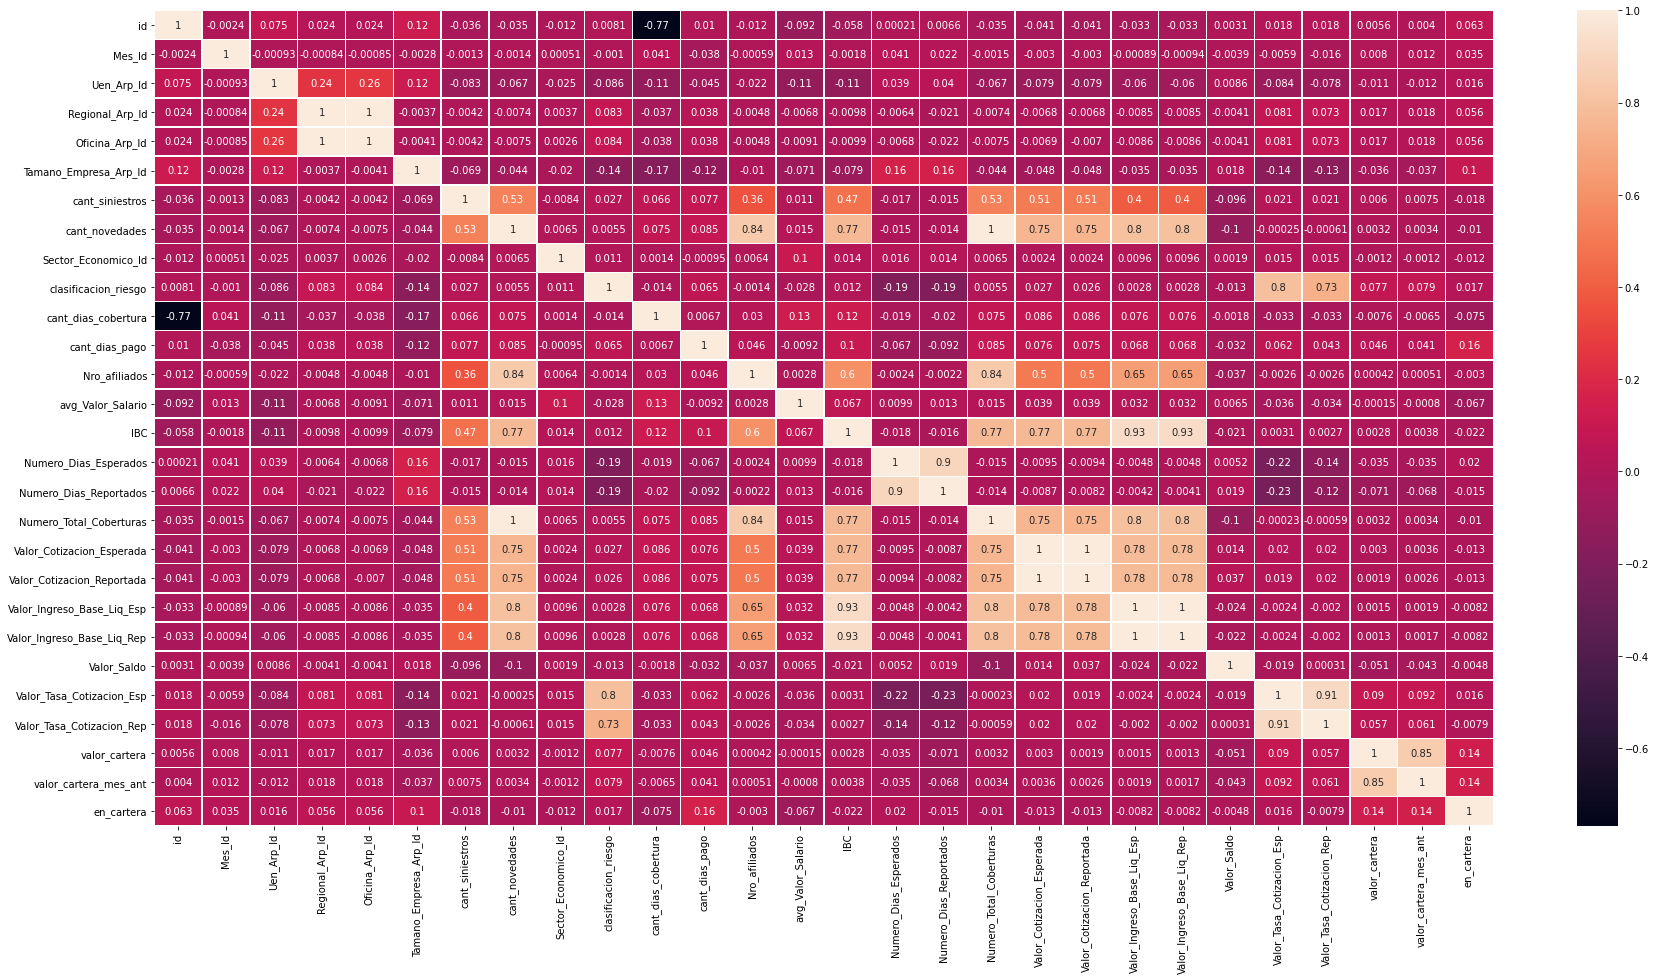

In [ ]:
plt.figure(figsize = (30,15))

corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True, linewidths=.5)

>Desbalance del dataset

en_cartera
0    818511
1    182741
Name: id, dtype: int64

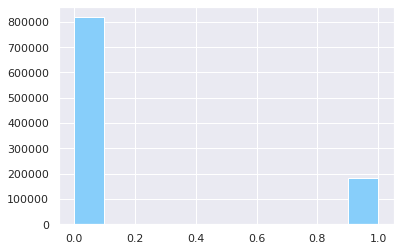

In [ ]:
df['en_cartera'].hist(color='#87CEFA')
dg = df.groupby(['en_cartera'])['id'].count() 
dg

>Análisis de temporalidad

Como se indicó anteriormente, se busca observar ahora si las variables cambian significativamente en el tiempo y, dado el nivel de importancia que pueda tener la variable en estudio o la cantidad de información que ésta agregue, definir si es un problema de clasificación o de series de tiempo.

>Cantidad de registros por mes

Mes_Id
202001    169060
202002    167369
202003    167006
202004    166455
202005    165676
202006    165686
Name: id, dtype: int64

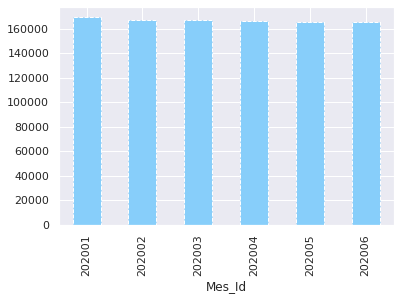

In [ ]:
dg = df.groupby(['Mes_Id'])['id'].count()
df.groupby(['Mes_Id'])['id'].count().plot(kind='bar',color='#87CEFA',linestyle='dashed')
dg

> Validación de la temporalidad de las variables categóricas

IndexError: ignored

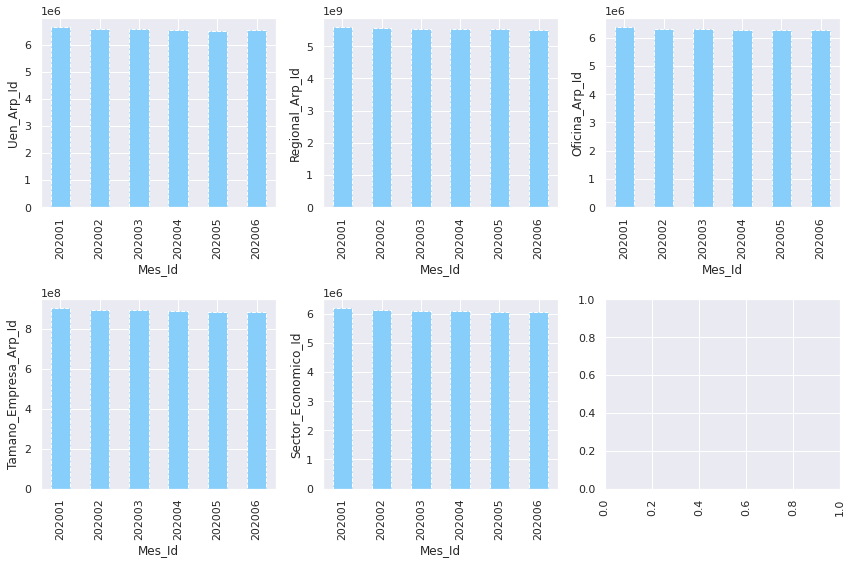

In [ ]:
nrows = 2
ncols = 3

fig, axes = plt.subplots(figsize=(12, 8) , nrows = nrows, ncols = ncols)
fig.tight_layout()

cols=['Uen_Arp_Id', 'Regional_Arp_Id', 'Oficina_Arp_Id',
       'Tamano_Empresa_Arp_Id', 'Sector_Economico_Id']

for i, category in enumerate(['Uen_Arp_Id', 'Regional_Arp_Id', 'Oficina_Arp_Id',
       'Tamano_Empresa_Arp_Id', 'Sector_Economico_Id']):   
    
    ax = axes[i%nrows][i%ncols]
    df.groupby(['Mes_Id'])[category].sum().plot(kind='bar', color='#87CEFA', linestyle='dashed', ax=ax)
    
i=1
for ax in fig.axes:
  plt.sca(ax)
  plt.xticks(rotation=90)
  fig.tight_layout()
  ax.set_ylabel(cols[i-1])
  i=i+1

En los gráficos anteriores se puede observar que no hay variaciones perceptibles en las variables categóricas, lo cual es consistente con la realidad del negocio, ya que las características de clasificación, ubicación y sector económico de una empresa rara vez cambian.

> Validación de la temporalidad de las variables numéricas

IndexError: ignored

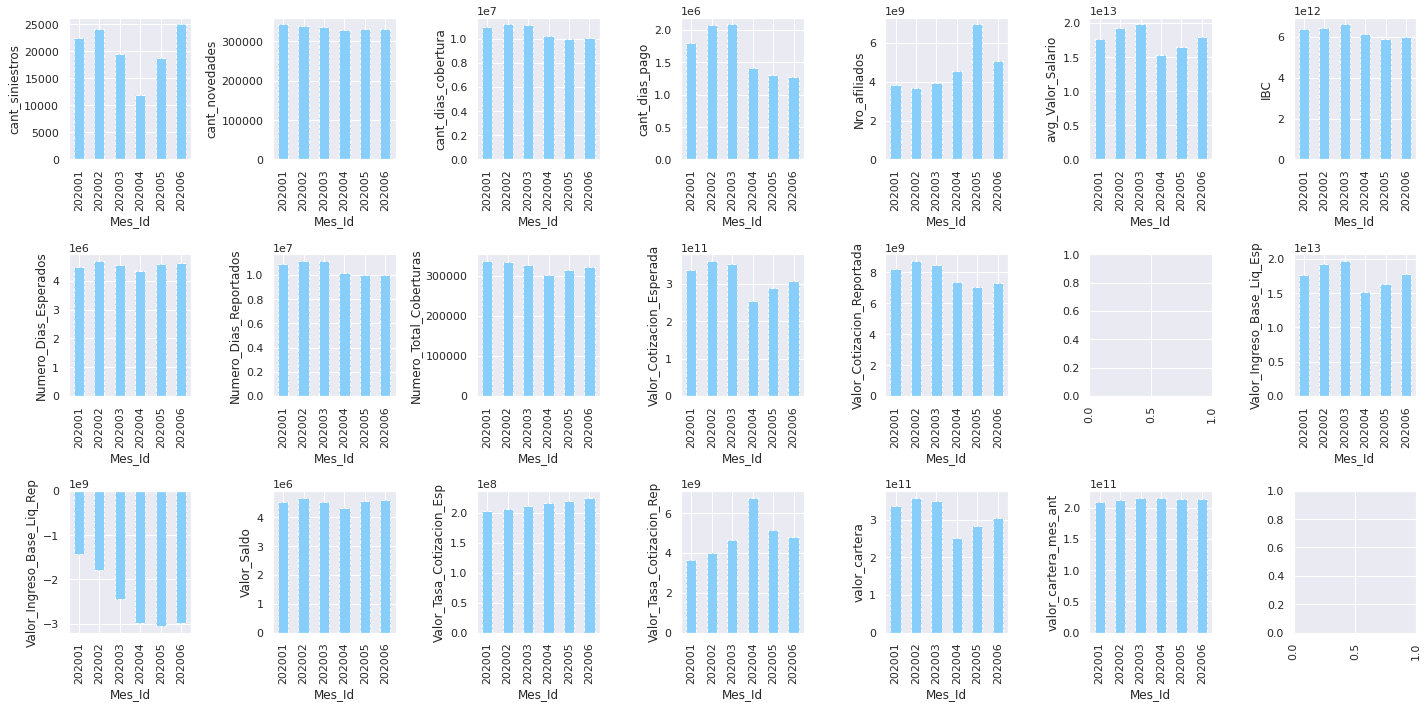

In [ ]:
nrows = 3
ncols = 7

fig, axes = plt.subplots(figsize=(20, 10) , nrows = nrows, ncols = ncols)
fig.tight_layout()

cols=['cant_siniestros', 'cant_novedades',
         'cant_dias_cobertura',
       'cant_dias_pago', 'Nro_afiliados', 'avg_Valor_Salario', 'IBC',
       'Numero_Dias_Esperados', 'Numero_Dias_Reportados',
       'Numero_Total_Coberturas', 'Valor_Cotizacion_Esperada',
       'Valor_Cotizacion_Reportada','', 'Valor_Ingreso_Base_Liq_Esp',
       'Valor_Ingreso_Base_Liq_Rep', 'Valor_Saldo',
       'Valor_Tasa_Cotizacion_Esp', 'Valor_Tasa_Cotizacion_Rep',
       'valor_cartera', 'valor_cartera_mes_ant']

for i, category in enumerate(['cant_siniestros', 'cant_novedades', 'cant_dias_cobertura',
       'cant_dias_pago', 'Nro_afiliados', 'avg_Valor_Salario', 'IBC',
       'Numero_Dias_Esperados', 'Numero_Dias_Reportados',
       'Numero_Total_Coberturas', 'Valor_Cotizacion_Esperada',
       'Valor_Cotizacion_Reportada', 'Valor_Ingreso_Base_Liq_Esp',
       'Valor_Ingreso_Base_Liq_Rep', 'Valor_Saldo',
       'Valor_Tasa_Cotizacion_Esp', 'Valor_Tasa_Cotizacion_Rep',
       'valor_cartera', 'valor_cartera_mes_ant']):   
    
    ax = axes[i%nrows][i%ncols]
    df.groupby(['Mes_Id'])[category].sum().plot(kind='bar', color='#87CEFA', linestyle='dashed', ax=ax)
    
i=0
for ax in fig.axes:
  plt.sca(ax)
  plt.xticks(rotation=90)
  fig.tight_layout()
  ax.set_ylabel(cols[i])
  i=i+1

Se observa el cambio en el comportamiento de las variables numéricas, sobretodo en el mes de abril, cuando la pandemia tuvo el pico máximo y comenzó luego la primera reactivacióón económica. Además de los cambios atibuidos a los efectos de la pandemia, los datos se comportan con la misma tendencia, ya sea creciente o decreciente, y no muestran cambios significativos en el tiempo, por lo que el caso en estudio se abordará como un problema de clasificación.

#Modelos

Se separa la columna de etiquetas del dataset:

In [ ]:
X = df.drop(['id','en_cartera','valor_cartera_mes_ant','valor_cartera'], axis=1) #Estas variables solo son diferentes de cero cuando esta en mora ( en_cartera = 1),
                                                                              #y al entrenar modelos con ellas el score es perfecto dado que 
                                                                              #es como entrenar con la variable a predecir, por lo que se toma la decisión sacarlas del dataset
y = df['en_cartera']
X, y

(         Mes_Id  ...  Valor_Tasa_Cotizacion_Rep
 0        202002  ...                      0.522
 1        202006  ...                      0.522
 2        202005  ...                      2.436
 3        202006  ...                      0.522
 4        202004  ...                      0.522
 ...         ...  ...                        ...
 1057792  202004  ...                      2.436
 1057793  202004  ...                      0.522
 1057794  202002  ...                      0.522
 1057795  202002  ...                      0.522
 1057796  202001  ...                      0.522
 
 [1057797 rows x 27 columns], 0          0
 1          0
 2          0
 3          1
 4          1
           ..
 1057792    1
 1057793    0
 1057794    1
 1057795    0
 1057796    0
 Name: en_cartera, Length: 1057797, dtype: int64)

In [ ]:
X.head()

,Mes_Id,Uen_Arp_Id,Regional_Arp_Id,Oficina_Arp_Id,Tamano_Empresa_Arp_Id,cant_siniestros,cant_novedades,Sector_Economico_Id,clasificacion_riesgo,cant_dias_cobertura,cant_dias_pago,Nro_afiliados,avg_Valor_Salario,IBC,Numero_Dias_Esperados,Numero_Dias_Reportados,Numero_Total_Coberturas,Valor_Cotizacion_Esperada,Valor_Cotizacion_Reportada,Valor_Ingreso_Base_Liq_Esp,Valor_Ingreso_Base_Liq_Rep,Valor_Saldo,Valor_Tasa_Cotizacion_Esp,Valor_Tasa_Cotizacion_Rep
0,202002,45,20,21,5347,0,1,431,1,1698,0,1.0,877803.0,877803,30.0,30.0,1,4600.0,4600.0,877803.0,877803.0,0.0,0.522,0.522
1,202006,45,20,21,5347,0,1,235,2,886,0,1.0,1850000.0,1850000,30.0,30.0,1,19400.0,9700.0,1850000.0,1850000.0,-9700.0,1.044,0.522
2,202005,16,40,41,5347,0,1,50,3,240,-4,1.0,877803.0,877803,30.0,30.0,1,21400.0,21400.0,877803.0,877803.0,0.0,2.436,2.436
3,202006,34,40,41,5347,0,1,236,5,1386,-4,1.0,2600000.0,2600000,30.0,30.0,1,13600.0,13600.0,2600000.0,2600000.0,0.0,0.522,0.522
4,202004,35,30,31,5347,0,1,236,1,2625,7,1.0,1000000.0,1000000,30.0,30.0,1,5300.0,5300.0,1000000.0,1000000.0,0.0,0.522,0.522


In [ ]:
X.shape, y.shape

((1001252, 24), (1001252,))

Se escalan las variables numéricas:

Se probarán diferentes métodos de escalamiento con el fin de observar si los modelos son sensibles al tipo de escalamiento de las variables; si se obtienen valores diferentes según el tipo de escalamiento, se podrá inferir que los modelos se verán también afectados por esas distributiones estadísticas.

> ***Standar Scaler***

In [ ]:
def scalerfunct1(dataframe, columnas):
  SS = StandardScaler()
  scaler = SS.fit(dataframe[columnas].values)
  dataframe[columnas] = scaler.transform(dataframe[columnas].values)  
  return dataframe

>***MinMax Scaler***

In [ ]:
def scalerfunct2(dataframe, columnas):
  MM = MinMaxScaler()
  scaler = MM.fit(dataframe[columnas].values)
  dataframe[columnas] = scaler.transform(dataframe[columnas].values)
  
  return dataframe


>***Robust Scaler***



In [ ]:
def scalerfunct3(dataframe, columnas):
  RS = RobustScaler()
  scaler = RS.fit(dataframe[columnas].values)
  dataframe[columnas] = scaler.transform(dataframe[columnas].values)
  
  return dataframe

>***Normalizer***

In [ ]:
def scalerfunct4(dataframe, columnas):
  N = Normalizer()
  scaler = N.fit(dataframe[columnas].values)
  dataframe[columnas] = scaler.transform(dataframe[columnas].values)
  
  return dataframe

Se definen las variables numéricas a las que se les aplicará el escalamiento:

In [ ]:
col_names = ['cant_siniestros',
             'cant_novedades', 
             'Nro_afiliados', 
             'avg_Valor_Salario', 
             'IBC', 
             'Numero_Dias_Esperados',
             'Numero_Dias_Reportados', 
             'Numero_Total_Coberturas', 
             'Valor_Cotizacion_Esperada', 
             'Valor_Cotizacion_Reportada', 
             'Valor_Ingreso_Base_Liq_Esp',
             'Valor_Ingreso_Base_Liq_Rep', 
             'Valor_Saldo', 
             'Valor_Tasa_Cotizacion_Esp',
             'Valor_Tasa_Cotizacion_Rep', 
             'cant_dias_pago', 
             'cant_dias_cobertura']

In [ ]:
X_n = scalerfunct1(X,col_names)

In [ ]:
X_n.head()

,Mes_Id,Uen_Arp_Id,Regional_Arp_Id,Oficina_Arp_Id,Tamano_Empresa_Arp_Id,cant_siniestros,cant_novedades,Sector_Economico_Id,clasificacion_riesgo,cant_dias_cobertura,cant_dias_pago,Nro_afiliados,avg_Valor_Salario,IBC,Numero_Dias_Esperados,Numero_Dias_Reportados,Numero_Total_Coberturas,Valor_Cotizacion_Esperada,Valor_Cotizacion_Reportada,Valor_Ingreso_Base_Liq_Esp,Valor_Ingreso_Base_Liq_Rep,Valor_Saldo,Valor_Tasa_Cotizacion_Esp,Valor_Tasa_Cotizacion_Rep
0,202002,45,20,21,5347,-0.063065,-0.041304,431,1,0.315626,-0.242227,-0.010137,-0.308143,-0.072721,0.492139,0.472952,-0.041319,-0.045456,-0.045078,-0.032869,-0.032712,0.015848,-0.710413,-0.688813
1,202006,45,20,21,5347,-0.063065,-0.041304,235,2,-0.300410,-0.242227,-0.010137,0.442200,-0.070787,0.492139,0.472952,-0.041319,-0.045101,-0.044956,-0.032566,-0.032408,0.005402,-0.459916,-0.688813
2,202005,16,40,41,5347,-0.063065,-0.041304,50,3,-0.790507,-0.339848,-0.010137,-0.308143,-0.072721,0.492139,0.472952,-0.041319,-0.045053,-0.044675,-0.032869,-0.032712,0.015848,0.208074,0.246692
3,202006,34,40,41,5347,-0.063065,-0.041304,236,5,0.078923,-0.339848,-0.010137,1.021052,-0.069295,0.492139,0.472952,-0.041319,-0.045240,-0.044862,-0.032331,-0.032174,0.015848,-0.710413,-0.688813
4,202004,35,30,31,5347,-0.063065,-0.041304,236,1,1.018908,-0.071390,-0.010137,-0.213831,-0.072478,0.492139,0.472952,-0.041319,-0.045439,-0.045061,-0.032831,-0.032674,0.015848,-0.710413,-0.688813


Se divide el conjunto de datos en entrenamiento y prueba. (Como el dataset esta desbalanceado se estratifica).

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_n, y, test_size=0.3, random_state=0, stratify=y)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=0, stratify=y_test)

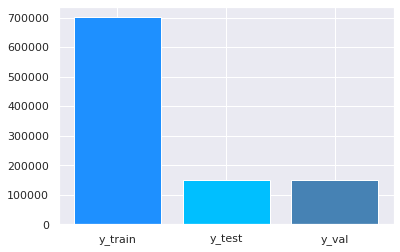

In [ ]:
# Distribución de las etiquetas - Aplica sólo para Prueba 2 y 4 (Validación)
u = ['y_train', 'y_test', 'y_val']
v = [y_train.shape[0], y_test.shape[0], y_val.shape[0]]
plt.bar(u, v, color=['#1E90FF','#00BFFF','#4682B4'])
plt.show()

Se escogen dos algorimos de clasificación *RandomForestClassifier* y *GradientBoostingClassifier*, y el algoritmo de regresión *LGBMClassifier*, con todos sus hiperparametros por defecto, para construir un valor base (*baseline*) y tomarlo como punto de partida para poder definir, comparar y mejorar los posteriores modelos.

In [ ]:
clf1 = RandomForestClassifier().fit(X_train, y_train)
clf2 = GradientBoostingClassifier().fit(X_train, y_train)
clf3 = LGBMClassifier().fit(X_train, y_train)

In [ ]:
# Se calcula el score de testeo

print(clf1.score(X_test, y_test))
print(clf2.score(X_test, y_test))
print(clf3.score(X_test, y_test))

0.843376301701867
0.8403800569952327
0.8419514208858231


In [ ]:
# Se calcula el score de validación

print(clf1.score(X_val, y_val))
print(clf2.score(X_val, y_val))
print(clf3.score(X_val, y_val))

0.8423775534663223
0.8388353263909234
0.8401936239912643


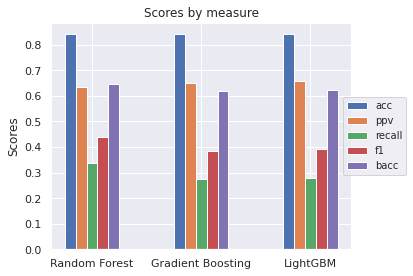

In [ ]:
labels = ['Random Forest', 'Gradient Boosting', 'LightGBM']
measures = ['acc', 'ppv', 'recall', 'f1', 'bacc']

Performance = []
Performance.append([accuracy_score(y_test,clf1.predict(X_test)), accuracy_score(y_test,clf2.predict(X_test)), accuracy_score(y_test,clf3.predict(X_test))])
Performance.append([precision_score(y_test,clf1.predict(X_test)), precision_score(y_test,clf2.predict(X_test)), precision_score(y_test,clf3.predict(X_test))])
Performance.append([recall_score(y_test,clf1.predict(X_test)), recall_score(y_test,clf2.predict(X_test)), recall_score(y_test,clf3.predict(X_test))])
Performance.append([f1_score(y_test,clf1.predict(X_test)), f1_score(y_test,clf2.predict(X_test)), f1_score(y_test,clf3.predict(X_test))])
Performance.append([balanced_accuracy_score(y_test,clf1.predict(X_test)), balanced_accuracy_score(y_test,clf2.predict(X_test)), balanced_accuracy_score(y_test,clf3.predict(X_test))])

x = np.arange(len(labels))*2
width = 0.2

fig, ax = plt.subplots()
for i in range(len(measures)):
    ax.bar(x + i*width + 0.3-0.7, Performance[i], width, label=measures[i])
    
ax.set_ylabel('Scores')
ax.set_title('Scores by measure')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(ncol=1,loc='center right', fontsize='small', bbox_to_anchor=(1.2, 0.5))
fig.tight_layout()
plt.show()

[[0.95678344 0.04321656]
 [0.66458721 0.33541279]]


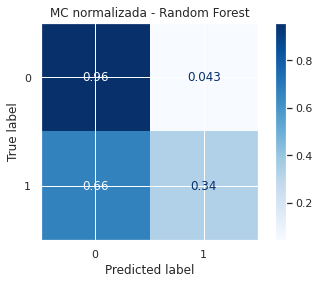

In [ ]:
#Matriz de confusión normalizada para Random Forest

disp = plot_confusion_matrix(clf1, X_test, y_test, display_labels=np.unique(y), cmap=plt.cm.Blues, normalize='true')

disp.ax_.set_title('MC normalizada - Random Forest')

print(disp.confusion_matrix)

plt.show()

[[0.96689119 0.03310881]
 [0.72627777 0.27372223]]


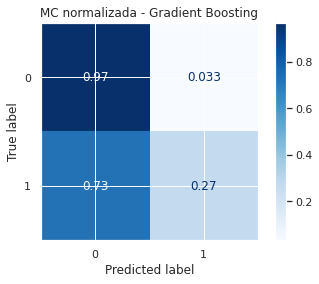

In [ ]:
#Matriz de confusión normalizada para Gradient Boosting

disp = plot_confusion_matrix(clf2, X_test, y_test, display_labels=np.unique(y), cmap=plt.cm.Blues, normalize='true')

disp.ax_.set_title('MC normalizada - Gradient Boosting')

print(disp.confusion_matrix)

plt.show()

[[0.96689119 0.03310881]
 [0.72627777 0.27372223]]


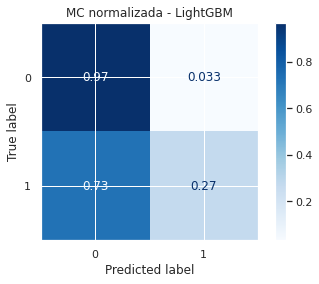

In [ ]:
#Matriz de confusión normalizada para LightGBM

disp = plot_confusion_matrix(clf2, X_test, y_test, display_labels=np.unique(y), cmap=plt.cm.Blues, normalize='true')

disp.ax_.set_title('MC normalizada - LightGBM')

print(disp.confusion_matrix)

plt.show()

Los datos y los modelos probados no evidenciaron ser sensibles al tipo de escalamiento utilizado, por lo que optaremos en los siguientes experimentos por el metodo de Standar Scaler. Según las matrices de confusión, el algoritmo de clasificación que arrojó el mejor resultado fue Random Forest.

Se prueban dos nuevos clasificadores: Bagging Classifier y EasyEnsemble, así como dos nuevos modelos Random Forest (con ajustes al parámetro class weight), para validar si se obtienen mejores resultados.

In [ ]:
clf4 = BaggingClassifier().fit(X_train, y_train) # Bagging con submuestras aleatorias
clf5 = RandomForestClassifier(n_estimators=10, class_weight='balanced').fit(X_train, y_train) # Random Forest con ponderación de clase
clf6 = RandomForestClassifier(n_estimators=10, class_weight='balanced_subsample').fit(X_train, y_train) # Random Forest con ponderación de clase Bootstrap
clf8 = EasyEnsembleClassifier(n_estimators=10).fit(X_train, y_train) # Easy Ensemble

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [ ]:
print(clf4.score(X_test, y_test))
print(clf5.score(X_test, y_test))
print(clf6.score(X_test, y_test))
print(clf8.score(X_test, y_test))

0.8332489945934429
0.8363184808373505
0.8361253895118118
0.7369430314006445


[[0.95300423 0.04699577]
 [0.70314837 0.29685163]]


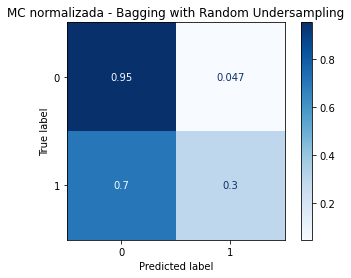

[[0.95885223 0.04114777]
 [0.71252417 0.28747583]]


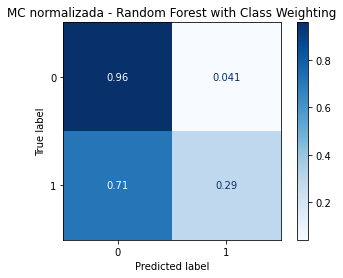

[[0.95915359 0.04084641]
 [0.71493196 0.28506804]]


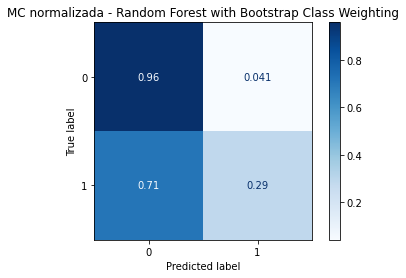

[[0.75498668 0.24501332]
 [0.34387655 0.65612345]]


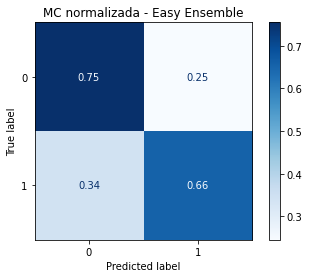

In [ ]:
disp = plot_confusion_matrix(clf4, X_test, y_test, display_labels=np.unique(y), cmap=plt.cm.Blues, normalize='true')
disp.ax_.set_title('MC normalizada - Bagging with Random Undersampling')
print(disp.confusion_matrix)
plt.show()

disp = plot_confusion_matrix(clf5, X_test, y_test, display_labels=np.unique(y), cmap=plt.cm.Blues, normalize='true')
disp.ax_.set_title('MC normalizada - Random Forest with Class Weighting')
print(disp.confusion_matrix)
plt.show()

disp = plot_confusion_matrix(clf6, X_test, y_test, display_labels=np.unique(y), cmap=plt.cm.Blues, normalize='true')
disp.ax_.set_title('MC normalizada - Random Forest with Bootstrap Class Weighting')
print(disp.confusion_matrix)
plt.show()

disp = plot_confusion_matrix(clf8, X_test, y_test, display_labels=np.unique(y), cmap=plt.cm.Blues, normalize='true')
disp.ax_.set_title('MC normalizada - Easy Ensemble')
print(disp.confusion_matrix)
plt.show()

Se observa que el algoritmo Random Forest continúa siendo el que mejor clasifica los datos, dado que es el que se confunde menos a la hora de predecir la clase o etiqueta correcta. Por lo que se escoge este resultado como el mejor baseline para comparar los modelos siguientes, variando sus hiperparámetros.

#Hiperparámetros

Ahora que se tiene un modelo base para comparar, se hará uso de GridSearch y Pipelines para encontrar los hiperpametros que mejoren el resultado de los modelos.

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)
Xtest, Xval, ytest, yval = train_test_split(Xtest, ytest, test_size=0.5, random_state=0, stratify=ytest)


In [ ]:
Xtrain.shape


(700876, 24)

***RandomForest Classifier***

In [ ]:
model = Pipeline([
    ('scaler', StandardScaler(with_mean=False)),
    ('Classifier',RandomForestClassifier(n_estimators=10, max_depth=6, class_weight='balanced_subsample'))
])

In [ ]:
st = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
tuned_parameters = [ {'Classifier__n_estimators':[6,8,10], 'Classifier__max_depth':[2,4,6], 'Classifier__max_features':[4,8,12,16]}]
model_tunning = GridSearchCV(estimator=model, param_grid=tuned_parameters, cv=st, scoring='balanced_accuracy',n_jobs=-1,verbose=2)

In [ ]:
model_tunning.fit(Xtrain, ytrain)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 14.8min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed: 19.0min finished


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=0, test_size=0.3,
            train_size=None),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=False,
                                                       with_std=True)),
                                       ('Classifier',
                                        RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha=0.0,
                                                               class_weight='balanced_subsample',
                                                               criterion='gini',
                                                               max_depth=6,
                                                               max_...
                

In [ ]:
model_tunning.best_estimator_.steps[1]

('Classifier', RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                        class_weight='balanced_subsample', criterion='gini',
                        max_depth=6, max_features=16, max_leaf_nodes=None,
                        max_samples=None, min_impurity_decrease=0.0,
                        min_impurity_split=None, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        n_estimators=8, n_jobs=None, oob_score=False,
                        random_state=None, verbose=0, warm_start=False))

In [ ]:
model_tunning.best_score_

0.7023118763095446

In [ ]:
y_pred = model_tunning.predict(Xtest)
cm = multilabel_confusion_matrix(ytest, y_pred)


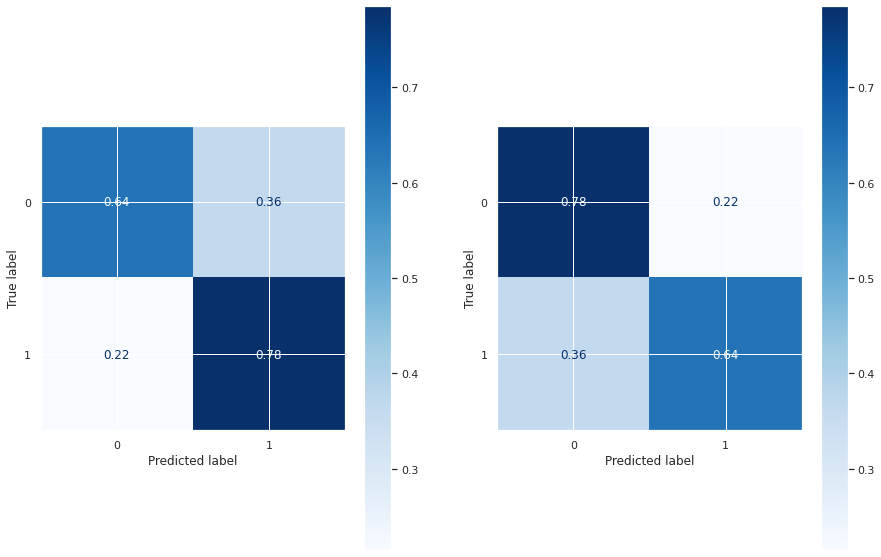

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15,10))

for i, (k, ax) in enumerate(zip(y, axes.flatten())):
    label = []
    label.append(k)
    label.append(1) 
    disp = ConfusionMatrixDisplay(confusion_matrix=(cm[i].T/np.sum(cm[i],axis=1)).T, display_labels=label)
    disp.plot(include_values=True,cmap=plt.cm.Blues, ax=ax, xticks_rotation='horizontal',
          values_format=None)
plt.show()

***Gradient Boosting Classifier***

- **Grupo 1 de parámetros:** n_estimators

In [ ]:
param_test1 = {'n_estimators':range(20,81,10)}

gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=1000, min_samples_leaf=100, max_depth=5, max_features='sqrt', subsample=0.8, random_state=10), param_grid = param_test1, scoring='roc_auc',n_jobs=-1,iid=False, cv=5)

In [ ]:
gsearch1.fit(Xtrain, ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=5,
                                                  max_features='sqrt',
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=100,
                                                  min_samples_split=1000,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
  

In [ ]:
gsearch1.best_estimator_

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=5,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=100, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=80,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=10, subsample=0.8, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
gsearch1.best_estimator_.fit(Xtrain, ytrain)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=5,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=100, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=80,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=10, subsample=0.8, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Accuracy = 0.8405465150344901
Balanced Accuracy = 0.6213719743581597


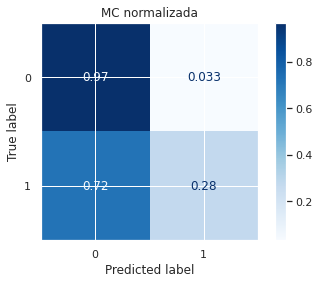

In [ ]:
yest = gsearch1.predict(Xtest)

print(f"Accuracy = {accuracy_score(ytest, yest)}")
print(f"Balanced Accuracy = {balanced_accuracy_score(ytest, yest)}")

disp = plot_confusion_matrix(gsearch1, Xtest, ytest, display_labels=np.unique(y), cmap=plt.cm.Blues, normalize='true')
disp.ax_.set_title('MC normalizada')
plt.show()

- **Grupo 2 de parámetros:** range, min_samples_split

In [ ]:
param_test2 = {'max_depth':range(5,12,2), 'min_samples_split':range(200,1001,2000)}

gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60, max_features='sqrt', subsample=0.8, random_state=10), param_grid = param_test2, scoring='roc_auc', n_jobs=-1, iid=False, cv=5)

In [ ]:
gsearch2.fit(Xtrain, ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features='sqrt',
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=60,
                                                  n_iter_no_change=None,
        

In [ ]:
gsearch2.best_estimator_

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=11,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=200,
                           min_weight_fraction_leaf=0.0, n_estimators=60,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=10, subsample=0.8, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
gsearch2.best_estimator_.fit(Xtrain, ytrain)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=11,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=200,
                           min_weight_fraction_leaf=0.0, n_estimators=60,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=10, subsample=0.8, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Accuracy = 0.8405465150344901
Balanced Accuracy = 0.6213719743581597


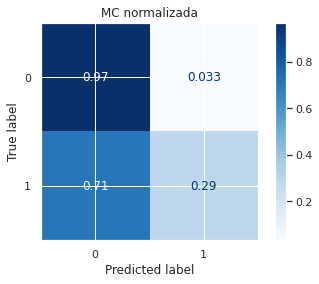

In [ ]:
y_est = gsearch2.predict(Xtest)

print(f"Accuracy = {accuracy_score(ytest, yest)}")
print(f"Balanced Accuracy = {balanced_accuracy_score(ytest, yest)}")

disp = plot_confusion_matrix(gsearch2, Xtest, ytest, display_labels=np.unique(y), cmap=plt.cm.Blues, normalize='true')
disp.ax_.set_title('MC normalizada')
plt.show()

- **Grupo 3 de parámetros:** min_samples_split, min_samples_leaf

In [ ]:
param_test3 = {'min_samples_split':range(200,1100,2000), 'min_samples_leaf':range(30,71,10)}

gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60, max_depth=9, max_features='sqrt', subsample=0.8, random_state=10), param_grid = param_test3, scoring='roc_auc', n_jobs=-1, iid=False, cv=5)

In [ ]:
gsearch3.fit(Xtrain, ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=9,
                                                  max_features='sqrt',
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=60,
                                                  n_iter_no_change=None,
        

In [ ]:
gsearch3.best_estimator_

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=9,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=50, min_samples_split=200,
                           min_weight_fraction_leaf=0.0, n_estimators=60,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=10, subsample=0.8, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
gsearch3.best_estimator_.fit(Xtrain, ytrain)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=9,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=50, min_samples_split=200,
                           min_weight_fraction_leaf=0.0, n_estimators=60,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=10, subsample=0.8, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Accuracy = 0.8405465150344901
Balanced Accuracy = 0.6213719743581597


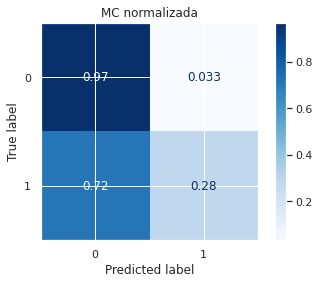

In [ ]:
y_est = gsearch3.predict(Xtest)

print(f"Accuracy = {accuracy_score(ytest, yest)}")
print(f"Balanced Accuracy = {balanced_accuracy_score(ytest, yest)}")

disp = plot_confusion_matrix(gsearch3, Xtest, ytest, display_labels=np.unique(y), cmap=plt.cm.Blues, normalize='true')
disp.ax_.set_title('MC normalizada')
plt.show()

- **Grupo 4 de parámetros:** max_features

In [ ]:
param_test4 = {'max_features':range(7,20,2)}

gsearch4 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60, max_depth=9, min_samples_split=1200, min_samples_leaf=60, subsample=0.8, random_state=10), param_grid = param_test4, scoring='roc_auc', n_jobs=-1, iid=False, cv=5)

In [ ]:
gsearch4.fit(Xtrain, ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=9,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=60,
                                                  min_samples_split=1200,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=60,
                                                  n_iter_no_change=None,
      

In [ ]:
gsearch4.best_estimator_

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=9,
                           max_features=19, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1200,
                           min_weight_fraction_leaf=0.0, n_estimators=60,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=10, subsample=0.8, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
gsearch4.best_estimator_.fit(Xtrain, ytrain)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=9,
                           max_features=19, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1200,
                           min_weight_fraction_leaf=0.0, n_estimators=60,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=10, subsample=0.8, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Accuracy = 0.8405465150344901
Balanced Accuracy = 0.6213719743581597


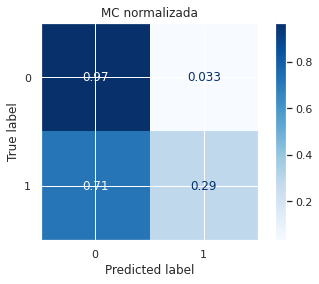

In [ ]:
y_est = gsearch4.predict(Xtest)

print(f"Accuracy = {accuracy_score(ytest, yest)}")
print(f"Balanced Accuracy = {balanced_accuracy_score(ytest, yest)}")

disp = plot_confusion_matrix(gsearch4, Xtest, ytest, display_labels=np.unique(y), cmap=plt.cm.Blues, normalize='true')
disp.ax_.set_title('MC normalizada')
plt.show()

- **Grupo 5 de parámetros:** subsample

In [ ]:
param_test5 = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}

gsearch5 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60, max_depth=9, min_samples_split=1200, min_samples_leaf=60, subsample=0.8, random_state=10, max_features=7), param_grid = param_test5, scoring='roc_auc', n_jobs=-1, iid=False, cv=5)

In [ ]:
gsearch5.fit(Xtrain, ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=9,
                                                  max_features=7,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=60,
                                                  min_samples_split=1200,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=60,
                                                  n_iter_no_change=None,
         

In [ ]:
gsearch5.best_estimator_

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=9,
                           max_features=7, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1200,
                           min_weight_fraction_leaf=0.0, n_estimators=60,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=10, subsample=0.9, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
gsearch5.best_estimator_.fit(Xtrain, ytrain)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=9,
                           max_features=7, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=1200,
                           min_weight_fraction_leaf=0.0, n_estimators=60,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=10, subsample=0.9, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Accuracy = 0.8421711454976429
Balanced Accuracy = 0.6248451207505537


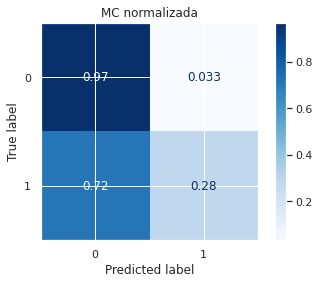

In [ ]:
yest = gsearch5.predict(Xtest)

print(f"Accuracy = {accuracy_score(ytest, yest)}")
print(f"Balanced Accuracy = {balanced_accuracy_score(ytest, yest)}")

disp = plot_confusion_matrix(gsearch5, Xtest, ytest, display_labels=np.unique(y), cmap=plt.cm.Blues, normalize='true')
disp.ax_.set_title('MC normalizada')
plt.show()

#Despliegue

**Generación del modelo para posterior despliegue como servicio**

Se toma el mejor resultado del pipeline y se exporta como archivo .pkl para desplegarlo como servicio en la nube de Azure, dado que así se deplegara en productivo.*texto en cursiva*

In [ ]:
import pickle
pickle.dump(model_tunning, open('/content/drive/Shareddrives/Monografia/model.pkl', 'wb'))

#Dataset ampliado

**Generacion de datos sintéticos con SMOTE**

Se prueba si el desempeño del modelo mejora al generar datos sintéticos para la clase que contiene menos muestras; adicionalmente, se aplicará PCA y el algoritmo de clasificación de K-vecinos más cercanos, en busca de una mejora del resultado obtenido en el pipeline del paso anterior.  


In [ ]:
pca = PCA(n_components=2)
enn = EditedNearestNeighbours()
smote = SMOTE(random_state=0)
knn = KNeighborsClassifier(n_neighbors=1)
scaler= StandardScaler(with_mean=False)

In [ ]:
model2 = make_pipeline(pca, enn, smote, scaler, knn)

In [ ]:
model2.fit(Xtrain, ytrain)
y_pred2 = model2.predict(Xtest)
print(classification_report(ytest, y_pred2))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.85      0.50      0.63    122777
           1       0.21      0.60      0.31     27411

    accuracy                           0.52    150188
   macro avg       0.53      0.55      0.47    150188
weighted avg       0.73      0.52      0.57    150188



In [ ]:
cm = multilabel_confusion_matrix(ytest, y_pred2)

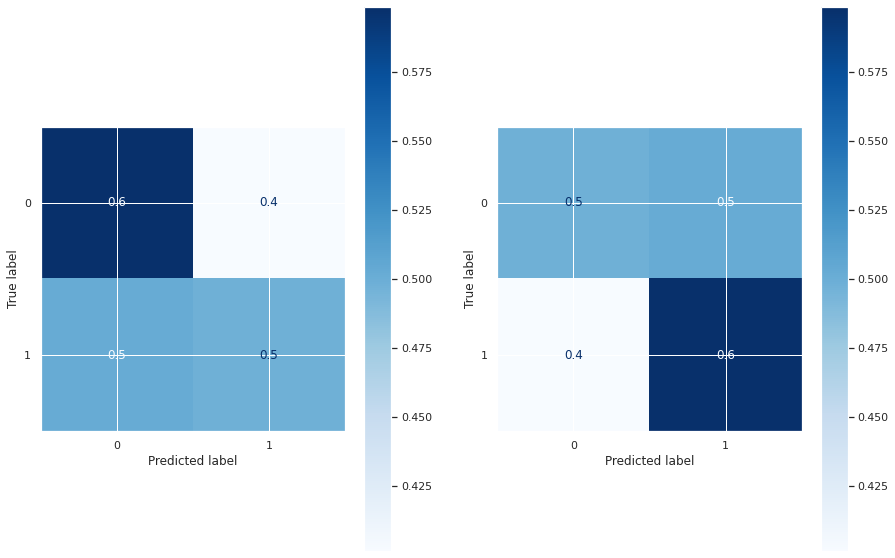

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15,10))

for i, (k, ax) in enumerate(zip(y, axes.flatten())):
    label = []
    label.append(k)
    label.append(1) 
    disp = ConfusionMatrixDisplay(confusion_matrix=(cm[i].T/np.sum(cm[i],axis=1)).T, display_labels=label)
    disp.plot(include_values=True,cmap=plt.cm.Blues, ax=ax, xticks_rotation='horizontal',
          values_format=None)
plt.show()

**Generación de datos sintéticos con SMOTE para RandomForestClassifier con GridSearch**

Ahora se analizará si mejora el desempeño del modelo con la generación de nuevas muestras, para el algoritmo que produjo anteriormente el mejor resultado.



In [ ]:
Classifier = RandomForestClassifier(class_weight='balanced_subsample')
model3 = make_pipeline(smote, scaler, Classifier)

In [ ]:
pipe_params = {
    "randomforestclassifier__n_estimators": [6,8,10],
    "randomforestclassifier__max_depth": [1, 5, 10, 25],
    "randomforestclassifier__max_features": [4,8,12,16],
}

In [ ]:
st = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
#tuned_parameters3 = dict({n_estimators=[6,8,10], max_depth=[2,4,6], max_features=[4,8,12,16]})
model_tunning3 = GridSearchCV(estimator=model3, param_grid=pipe_params, cv=st, scoring='balanced_accuracy',n_jobs=-1,verbose=2)

In [ ]:
model_tunning3.fit(Xtrain, ytrain)
y_pred3 = model_tunning3.predict(Xtest)
print(classification_report(ytest, y_pred3))

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 26.0min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 123.7min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 226.9min finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.90      0.78      0.84    122777
           1       0.38      0.59      0.46     27411

    accuracy                           0.75    150188
   macro avg       0.64      0.69      0.65    150188
weighted avg       0.80      0.75      0.77    150188



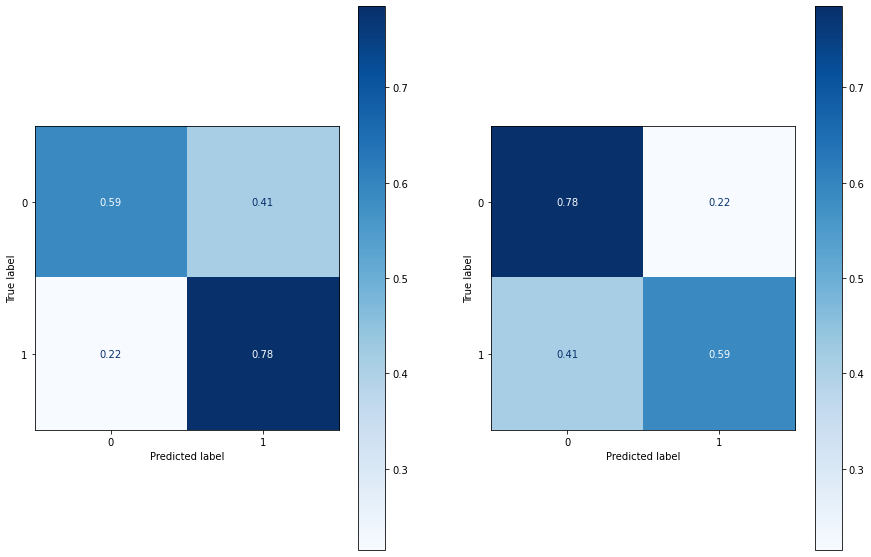

In [ ]:
cm = multilabel_confusion_matrix(ytest, y_pred3)
fig, axes = plt.subplots(1, 2, figsize=(15,10))

for i, (k, ax) in enumerate(zip(y, axes.flatten())):
    label = []
    label.append(k)
    label.append(1) 
    disp = ConfusionMatrixDisplay(confusion_matrix=(cm[i].T/np.sum(cm[i],axis=1)).T, display_labels=label)
    disp.plot(include_values=True,cmap=plt.cm.Blues, ax=ax, xticks_rotation='horizontal',
          values_format=None)
plt.show()

Con la generación de pruebas sintéticas aumentaron los falsos positivos, mientras que el número de falsos negativos permanece igual; por tanto, se concluye que la generación de nuevas muestras no mejora el desempeño del modelo.

**Agregación de variables externas al dataset original**

En este apartado, se busca observar si agregando variables de fuentes externas al dataset original, mejora el resultado de los modelos a evaluar.


Los campos a agregar corresponden a datos económicos como: *IPC* ( Indices de Precio del Consumidor), *IPP*(Indices de Precio del Productor), *ICC* (Indice de Confianza del Consumidor) y Tasa de Desempleo (TD) que, a consideración del negocio, son variables que pueden influir positiva o negativamente en el comportamiento de pago de las empresas.

A continuación, se repiten los pasos anteriores con el nuevo dataset ampliado.

In [ ]:
X = df.drop(['id','en_cartera','valor_cartera_mes_ant','valor_cartera'],axis=1)
y = df['en_cartera']

In [ ]:
df['Mes_Id'].unique()

array([202002, 202006, 202005, 202004, 202003, 202001])

In [ ]:
IPC = {202001: '0.0362', 202002: '0.0372', 202003: '0.0386', 202004: '0.0351', 202005: '0.0285', 202006: '0.0219', 202007: '0.0197', 202008: '0.0188', 202009: '0.0197', 202010: '0.0175', 202011: '0.0149', 202012: '0.0161'}
IPP = {202001: '122.34', 202002: '122.34', 202003: '123.27', 202004: '122.59', 202005: '122.5', 202006: '122.59', 202007: '122.76', 202008: '123.54', 202009: '123.7', 202010: '124.42', 202011: '124.31', 202012: '124.38'}
ICC = {202001: '-0.012', 202002: '-0.112', 202003: '-0.238', 202004: '-0.413', 202005: '-0.34', 202006: '-0.331', 202007: '-0.327', 202008: '-0.254', 202009: '-0.216', 202010: '-0.186', 202011: '-0.136', 202012: '-0.104'}
TD = {202001: '0.1299', 202002: '0.1216', 202003: '0.1263', 202004: '0.1981', 202005: '0.2138', 202006: '0.1981', 202007: '0.2022', 202008: '0.1676', 202009: '0.1577', 202010: '0.1465', 202011: '0.1331', 202012: '0.1337'}

In [ ]:
X['IPC'] = X['Mes_Id'].map(IPC)
X['IPP'] = X['Mes_Id'].map(IPP)
X['ICC'] = X['Mes_Id'].map(ICC)
X['TD'] = X['Mes_Id'].map(TD)
X

,Mes_Id,Uen_Arp_Id,Regional_Arp_Id,Oficina_Arp_Id,Tamano_Empresa_Arp_Id,cant_siniestros,cant_novedades,Sector_Economico_Id,clasificacion_riesgo,cant_dias_cobertura,cant_dias_pago,Nro_afiliados,avg_Valor_Salario,IBC,Numero_Dias_Esperados,Numero_Dias_Reportados,Numero_Total_Coberturas,Valor_Cotizacion_Esperada,Valor_Cotizacion_Reportada,Valor_Ingreso_Base_Liq_Esp,Valor_Ingreso_Base_Liq_Rep,Valor_Saldo,Valor_Tasa_Cotizacion_Esp,Valor_Tasa_Cotizacion_Rep,IPC,IPP,ICC,TD
0,202002,45,20,21,5347,0,1,431,1,1698,0,1.0,877803.00,877803,30.0,30.0,1,4600.0,4600.0,877803.0,877803.0,0.0,0.522,0.522,0.0372,122.34,-0.112,0.1216
1,202006,45,20,21,5347,0,1,235,2,886,0,1.0,1850000.00,1850000,30.0,30.0,1,19400.0,9700.0,1850000.0,1850000.0,-9700.0,1.044,0.522,0.0219,122.59,-0.331,0.1981
2,202005,16,40,41,5347,0,1,50,3,240,-4,1.0,877803.00,877803,30.0,30.0,1,21400.0,21400.0,877803.0,877803.0,0.0,2.436,2.436,0.0285,122.5,-0.34,0.2138
3,202006,34,40,41,5347,0,1,236,5,1386,-4,1.0,2600000.00,2600000,30.0,30.0,1,13600.0,13600.0,2600000.0,2600000.0,0.0,0.522,0.522,0.0219,122.59,-0.331,0.1981
4,202004,35,30,31,5347,0,1,236,1,2625,7,1.0,1000000.00,1000000,30.0,30.0,1,5300.0,5300.0,1000000.0,1000000.0,0.0,0.522,0.522,0.0351,122.59,-0.413,0.1981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001247,202004,11,30,31,5347,0,4,103299,3,1156,-8,16.0,877803.00,3511212,30.0,30.0,4,85600.0,85600.0,3511212.0,3511212.0,0.0,2.436,2.436,0.0351,122.59,-0.413,0.1981
1001248,202004,45,20,21,5347,0,2,521963,2,958,-2,4.0,1051581.50,2103164,24.5,24.5,2,18700.0,9400.0,1781302.0,1781302.0,-9300.0,1.044,0.522,0.0351,122.59,-0.413,0.1981
1001249,202002,49,50,51,5346,0,4,235,2,304,7,16.0,1072410.25,4289641,30.0,30.0,4,44900.0,22500.0,4289641.0,4289641.0,-22400.0,1.044,0.522,0.0372,122.34,-0.112,0.1216
1001250,202002,45,20,21,5346,0,2,341,1,394,-6,4.0,877803.00,1755606,30.0,30.0,2,9200.0,9200.0,1755606.0,1755606.0,0.0,0.522,0.522,0.0372,122.34,-0.112,0.1216


In [ ]:
X.shape, y.shape

((1001252, 28), (1001252,))

In [ ]:
def scalerfunct1(dataframe, columnas):
  SS = StandardScaler()
  scaler = SS.fit(dataframe[columnas].values)
  dataframe[columnas] = scaler.transform(dataframe[columnas].values)  
  return dataframe

In [ ]:
col_names = ['cant_siniestros',
             'cant_novedades', 
             'Nro_afiliados', 
             'avg_Valor_Salario', 
             'IBC', 
             'Numero_Dias_Esperados',
             'Numero_Dias_Reportados', 
             'Numero_Total_Coberturas', 
             'Valor_Cotizacion_Esperada', 
             'Valor_Cotizacion_Reportada', 
             'Valor_Ingreso_Base_Liq_Esp',
             'Valor_Ingreso_Base_Liq_Rep', 
             'Valor_Saldo', 
             'Valor_Tasa_Cotizacion_Esp',
             'Valor_Tasa_Cotizacion_Rep', 
             'cant_dias_pago', 
             'cant_dias_cobertura',
             'IPC',
             'IPP',
             'ICC',
             'TD']

In [ ]:
X_n = scalerfunct1(X, col_names)

In [ ]:
X_n.head()

,Mes_Id,Uen_Arp_Id,Regional_Arp_Id,Oficina_Arp_Id,Tamano_Empresa_Arp_Id,cant_siniestros,cant_novedades,Sector_Economico_Id,clasificacion_riesgo,cant_dias_cobertura,cant_dias_pago,Nro_afiliados,avg_Valor_Salario,IBC,Numero_Dias_Esperados,Numero_Dias_Reportados,Numero_Total_Coberturas,Valor_Cotizacion_Esperada,Valor_Cotizacion_Reportada,Valor_Ingreso_Base_Liq_Esp,Valor_Ingreso_Base_Liq_Rep,Valor_Saldo,Valor_Tasa_Cotizacion_Esp,Valor_Tasa_Cotizacion_Rep,IPC,IPP,ICC,TD
0,202002,45,20,21,5347,-0.063065,-0.041304,431,1,0.315626,-0.242227,-0.010137,-0.308143,-0.072721,0.492139,0.472952,-0.041319,-0.045456,-0.045078,-0.032869,-0.032712,0.015848,-0.710413,-0.688813,0.725851,-0.839636,0.917210,-1.094734
1,202006,45,20,21,5347,-0.063065,-0.041304,235,2,-0.300410,-0.242227,-0.010137,0.442200,-0.070787,0.492139,0.472952,-0.041319,-0.045101,-0.044956,-0.032566,-0.032408,0.005402,-0.459916,-0.688813,-1.883617,-0.046113,-0.650381,0.861124
2,202005,16,40,41,5347,-0.063065,-0.041304,50,3,-0.790507,-0.339848,-0.010137,-0.308143,-0.072721,0.492139,0.472952,-0.041319,-0.045053,-0.044675,-0.032869,-0.032712,0.015848,0.208074,0.246692,-0.757964,-0.331781,-0.714802,1.262522
3,202006,34,40,41,5347,-0.063065,-0.041304,236,5,0.078923,-0.339848,-0.010137,1.021052,-0.069295,0.492139,0.472952,-0.041319,-0.045240,-0.044862,-0.032331,-0.032174,0.015848,-0.710413,-0.688813,-1.883617,-0.046113,-0.650381,0.861124
4,202004,35,30,31,5347,-0.063065,-0.041304,236,1,1.018908,-0.071390,-0.010137,-0.213831,-0.072478,0.492139,0.472952,-0.041319,-0.045439,-0.045061,-0.032831,-0.032674,0.015848,-0.710413,-0.688813,0.367689,-0.046113,-1.237333,0.861124


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_n, y, test_size=0.3, random_state=0, stratify=y)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=0, stratify=y_test)

Se corren los modelos para las líneas base:

In [ ]:
clf1 = RandomForestClassifier().fit(X_train, y_train)
clf2 = GradientBoostingClassifier().fit(X_train, y_train)
clf3 = LGBMClassifier().fit(X_train, y_train)

In [ ]:
# Se calcula el score de testeo

print(clf1.score(X_test, y_test))
print(clf2.score(X_test, y_test))
print(clf3.score(X_test, y_test))

0.8376235118651291
0.8404466402109356
0.8419314459211122


In [ ]:
# Se calcula el score de validación

print(clf1.score(X_val, y_val))
print(clf2.score(X_val, y_val))
print(clf3.score(X_val, y_val))

0.8352131994566809
0.8384890936692678
0.8399073161637415


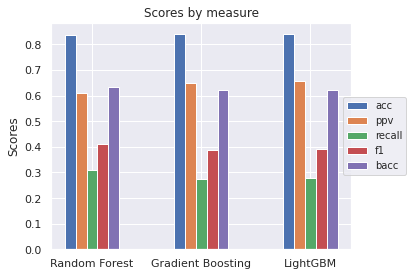

In [ ]:
labels = ['Random Forest', 'Gradient Boosting', 'LightGBM']
measures = ['acc','ppv','recall','f1','bacc']

Performance = []
Performance.append([accuracy_score(y_test,clf1.predict(X_test)), accuracy_score(y_test,clf2.predict(X_test)), accuracy_score(y_test,clf3.predict(X_test))])
Performance.append([precision_score(y_test,clf1.predict(X_test)), precision_score(y_test,clf2.predict(X_test)), precision_score(y_test,clf3.predict(X_test))])
Performance.append([recall_score(y_test,clf1.predict(X_test)), recall_score(y_test,clf2.predict(X_test)), recall_score(y_test,clf3.predict(X_test))])
Performance.append([f1_score(y_test,clf1.predict(X_test)), f1_score(y_test,clf2.predict(X_test)), f1_score(y_test,clf3.predict(X_test))])
Performance.append([balanced_accuracy_score(y_test,clf1.predict(X_test)), balanced_accuracy_score(y_test,clf2.predict(X_test)), balanced_accuracy_score(y_test,clf3.predict(X_test))])

x = np.arange(len(labels))*2
width = 0.2

fig, ax = plt.subplots()
for i in range(len(measures)):
    ax.bar(x + i*width + 0.3-0.7, Performance[i], width, label=measures[i])
    
ax.set_ylabel('Scores')
ax.set_title('Scores by measure')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(ncol=1,loc='center right', fontsize='small', bbox_to_anchor=(1.2, 0.5))
fig.tight_layout()
plt.show()

[[0.95570017 0.04429983]
 [0.69125534 0.30874466]]


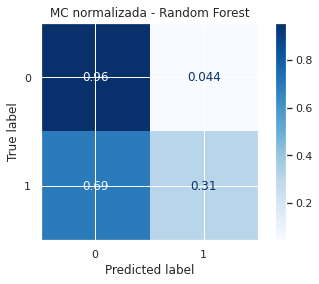

In [ ]:
#Matriz de confusión normalizada para Random Forest

disp = plot_confusion_matrix(clf1, X_test, y_test, display_labels=np.unique(y), cmap=plt.cm.Blues, normalize='true')

disp.ax_.set_title('MC normalizada - Random Forest')

print(disp.confusion_matrix)

plt.show()

[[0.96685047 0.03314953]
 [0.72573055 0.27426945]]


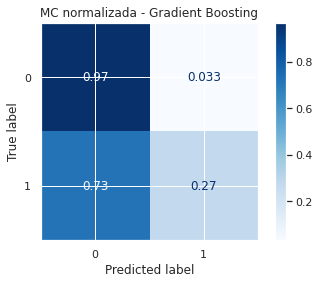

In [ ]:
#Matriz de confusión normalizada para Gradient Boosting

disp = plot_confusion_matrix(clf2, X_test, y_test, display_labels=np.unique(y), cmap=plt.cm.Blues, normalize='true')

disp.ax_.set_title('MC normalizada - Gradient Boosting')

print(disp.confusion_matrix)

plt.show()

[[0.96685047 0.03314953]
 [0.72573055 0.27426945]]


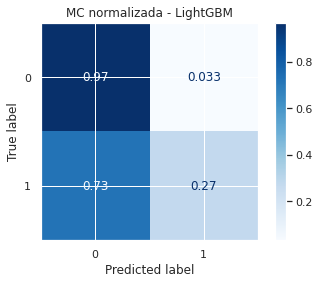

In [ ]:
#Matriz de confusión normalizada para LightGBM

disp = plot_confusion_matrix(clf2, X_test, y_test, display_labels=np.unique(y), cmap=plt.cm.Blues, normalize='true')

disp.ax_.set_title('MC normalizada - LightGBM')

print(disp.confusion_matrix)

plt.show()

Se prueban otros algoritmos de clasificación para conjuntos desbalanceados:


In [ ]:
clf4 = BaggingClassifier().fit(X_train, y_train)
clf8 = EasyEnsembleClassifier(n_estimators=10).fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [ ]:
print(clf4.score(X_test, y_test))
print(clf8.score(X_test, y_test))

0.8315444642714465
0.7275947479159454


[[0.95299608 0.04700392]
 [0.71245121 0.28754879]]


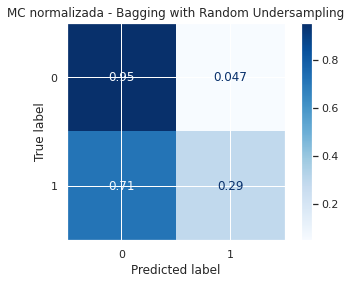

[[0.74175945 0.25824055]
 [0.33585057 0.66414943]]


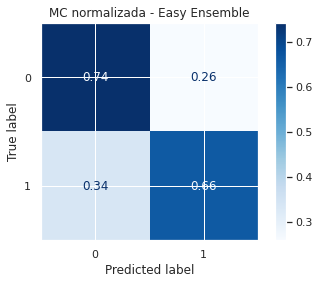

In [ ]:
disp = plot_confusion_matrix(clf4, X_test, y_test, display_labels=np.unique(y), cmap=plt.cm.Blues, normalize='true')
disp.ax_.set_title('MC normalizada - Bagging with Random Undersampling')
print(disp.confusion_matrix)
plt.show()

disp = plot_confusion_matrix(clf8, X_test, y_test, display_labels=np.unique(y), cmap=plt.cm.Blues, normalize='true')
disp.ax_.set_title('MC normalizada - Easy Ensemble')
print(disp.confusion_matrix)
plt.show()

**Búsqueda de hiperparámetros para el dataset ampliado**

In [ ]:
model = Pipeline([
    ('scaler', StandardScaler(with_mean=False)),
    ('Classifier', RandomForestClassifier(n_estimators=10, max_depth=6))
])

In [ ]:
st = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
tuned_parameters = [ {'Classifier__n_estimators':[10,15,20,50], 'Classifier__max_depth':[2,4,6,10], 'Classifier__max_features':[4,8,12,16],'Classifier__class_weight':['balanced','balanced_subsample']}]
model_tunning = GridSearchCV(estimator=model, param_grid=tuned_parameters, cv=st, scoring='balanced_accuracy',n_jobs=-1,verbose=2)

In [ ]:
model_tunning.fit(X_train, y_train)

Fitting 5 folds for each of 128 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 30.7min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 109.9min
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed: 210.9min finished


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=0, test_size=0.3,
            train_size=None),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=False,
                                                       with_std=True)),
                                       ('Classifier',
                                        RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=6,
                                                               max_features='auto',...
                

In [ ]:
model_tunning.best_estimator_.steps[1]

('Classifier', RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                        class_weight='balanced_subsample', criterion='gini',
                        max_depth=10, max_features=16, max_leaf_nodes=None,
                        max_samples=None, min_impurity_decrease=0.0,
                        min_impurity_split=None, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        n_estimators=50, n_jobs=None, oob_score=False,
                        random_state=None, verbose=0, warm_start=False))

In [ ]:
model_tunning.best_score_

0.7097794924443498

In [ ]:
y_pred = model_tunning.predict(X_test)
cm = multilabel_confusion_matrix(y_test, y_pred)

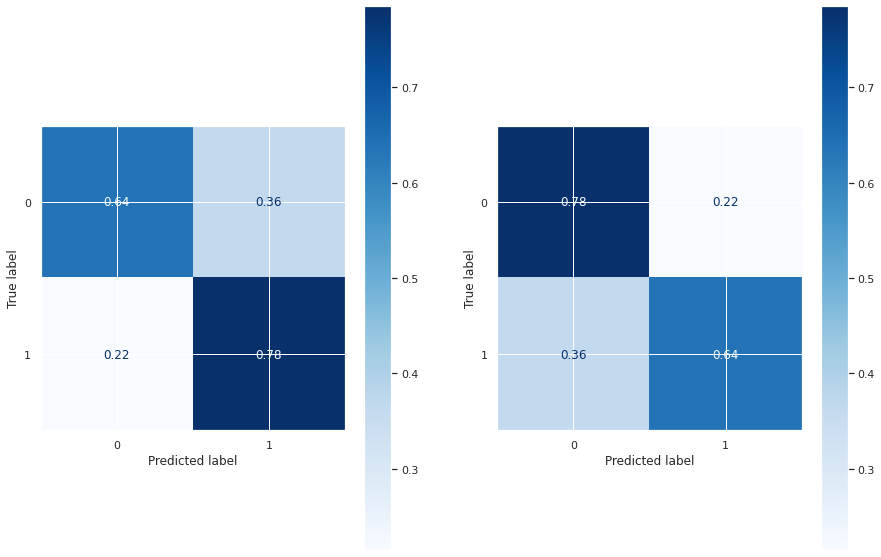

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15,10))

for i, (k, ax) in enumerate(zip(y, axes.flatten())):
    label = []
    label.append(k)
    label.append(1) 
    disp = ConfusionMatrixDisplay(confusion_matrix=(cm[i].T/np.sum(cm[i],axis=1)).T, display_labels=label)
    disp.plot(include_values=True,cmap=plt.cm.Blues, ax=ax, xticks_rotation='horizontal',
          values_format=None)
plt.show()

**Generacion de datos sintéticos con SMOTE**

In [ ]:
pca = PCA(n_components=2)
enn = EditedNearestNeighbours()
smote = SMOTE(random_state=0)
knn = KNeighborsClassifier(n_neighbors=1)
scaler= StandardScaler(with_mean=False)

In [ ]:
from imblearn.pipeline import make_pipeline

model2 = make_pipeline(pca, enn, smote, scaler,knn)

In [ ]:
from sklearn.metrics import classification_report

model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
print(classification_report(y_test, y_pred2))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.85      0.50      0.63    122777
           1       0.21      0.59      0.31     27411

    accuracy                           0.51    150188
   macro avg       0.53      0.54      0.47    150188
weighted avg       0.73      0.51      0.57    150188



In [ ]:
cm = multilabel_confusion_matrix(y_test, y_pred2)

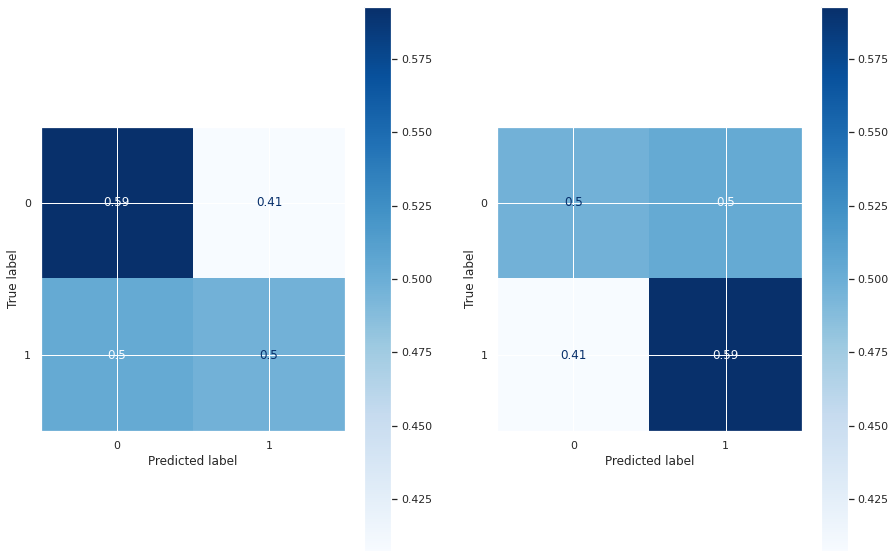

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15,10))

for i, (k, ax) in enumerate(zip(y, axes.flatten())):
    label = []
    label.append(k)
    label.append(1) 
    disp = ConfusionMatrixDisplay(confusion_matrix=(cm[i].T/np.sum(cm[i],axis=1)).T, display_labels=label)
    disp.plot(include_values=True,cmap=plt.cm.Blues, ax=ax, xticks_rotation='horizontal',
          values_format=None)
plt.show()

**Generación de datos sintéticos con SMOTE para RandomForestClassifier con GridSearch**

In [ ]:
Classifier=RandomForestClassifier(class_weight='balanced_subsample')
model3 = make_pipeline(smote, scaler, Classifier)

In [ ]:
pipe_params = {
    "randomforestclassifier__n_estimators": [6,8,10],
    "randomforestclassifier__max_depth": [1, 5, 10, 25],
    "randomforestclassifier__max_features": [4,8,12,16],
}

In [ ]:
st = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
model_tunning3 = GridSearchCV(estimator=model3, param_grid=pipe_params, cv=st, scoring='balanced_accuracy',n_jobs=-1,verbose=2)

In [ ]:
model_tunning3.fit(X_train, y_train)
y_pred3 = model_tunning3.predict(X_test)
print(classification_report(y_test, y_pred3))

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 22.1min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 113.1min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 207.0min finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.90      0.74      0.81    122777
           1       0.36      0.65      0.46     27411

    accuracy                           0.72    150188
   macro avg       0.63      0.70      0.64    150188
weighted avg       0.81      0.72      0.75    150188



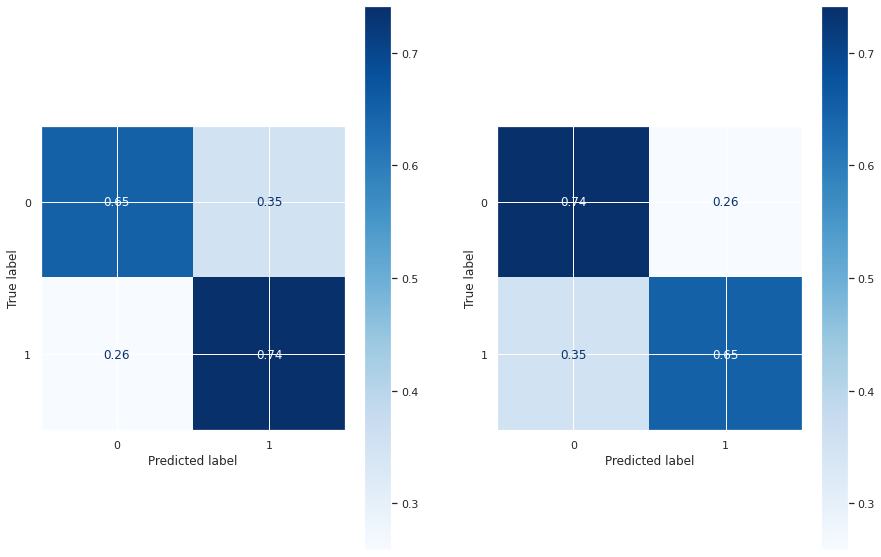

In [ ]:
cm = multilabel_confusion_matrix(y_test, y_pred3)
fig, axes = plt.subplots(1, 2, figsize=(15,10))

for i, (k, ax) in enumerate(zip(y, axes.flatten())):
    label = []
    label.append(k)
    label.append(1) 
    disp = ConfusionMatrixDisplay(confusion_matrix=(cm[i].T/np.sum(cm[i],axis=1)).T, display_labels=label)
    disp.plot(include_values=True,cmap=plt.cm.Blues, ax=ax, xticks_rotation='horizontal',
          values_format=None)
plt.show()

Se evidencia que los resultados tienden a empeorar cuando se agregan datos sinteticos y/o datos externos, por lo que se concluye que el modelo que arroja el mejor resultado es RandomForestClassifier con los siguientes hiperparámetros: 

>('Classifier', RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                        class_weight='balanced_subsample', criterion='gini',
                        max_depth=6, max_features=16, max_leaf_nodes=None,
                        max_samples=None, min_impurity_decrease=0.0,
                        min_impurity_split=None, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        n_estimators=8, n_jobs=None, oob_score=False,
                        random_state=None, verbose=0, warm_start=False))


El score obtenido para este modelo es del 70%.